# Lecture 12: Application 1 - Linear Regression 

<font size = "5">

We will fit statistical models to data

- I will give an intro with minimal stats background
- See the optional lecture file for advanced users

The primary goal is to practice previous commands

# I. Import Libraries 


In [6]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


<font size = "5">

Install the "statsmodels" library

```conda install statsmodels```

- In Windows, you can do this by opening the program  <br> "anaconda
prompt" and typing the above command.
- In Mac, you can open your terminal and <br>
type the above command

In [7]:
# We will "alias" two sublibraries in "statsmodels"
# "statsmodels.formula.api" contains functions to estimate models
# "statsmodels.api" contains general-use statistical options

import statsmodels.api as sm
import statsmodels.formula.api as smf


# II. Generate simulated Data 

<font size = "5">

Create an empty dataset

In [8]:
dataset = pd.DataFrame()

<font size = "5">

Create two random variables of size ($n = 50$)

In [9]:
n = 50
np.random.seed(42)
dataset["x"] = np.random.normal(loc = 0,scale = 1, size = n)
dataset["e"] = np.random.normal(loc = 0,scale = 1, size = n)

<font size = "5">

Create data from the linear model

$ y = b_0 + b_1 x + e, \qquad b_0 = 1, b_1 = 2.$

In [10]:
# The number b0 is known as the "intercept"
# The number b1 is known as the "slope"

b0 = 1
b1 = 2

# We can compute formulas directly over dataset columns
dataset["y"] = b0 + b1 * dataset["x"] + dataset["e"]

In [11]:
dataset['y']

0     2.317512
1     0.338389
2     1.618455
3     4.657736
4     1.562693
5     1.463006
6     3.319208
7     2.225657
8     0.392315
9     3.060665
10   -0.406010
11   -0.117118
12    0.377590
13   -4.022767
14   -1.637310
15    1.231665
16   -1.097672
17    2.632028
18   -0.454412
19   -2.469727
20    4.292693
21    2.086484
22    1.099230
23   -0.284853
24   -2.708511
25    2.043748
26   -1.214940
27    1.452389
28   -0.109517
29   -1.570956
30   -0.423085
31    5.061669
32    2.450900
33   -1.633692
34    1.836596
35   -1.943444
36    2.333129
37   -2.590589
38   -2.186132
39    1.906990
40    2.574011
41    2.311382
42    0.066650
43    0.070130
44   -2.349152
45   -1.903203
46    0.374843
47    3.375300
48    1.692350
49   -2.760667
Name: y, dtype: float64

<font size = "5">

Compute the theoretically best fit line

$ p = b_0 + b_1 x$

In [12]:
dataset["p"] = b0 + b1*dataset["x"]

<font size = "5">

Plot the data

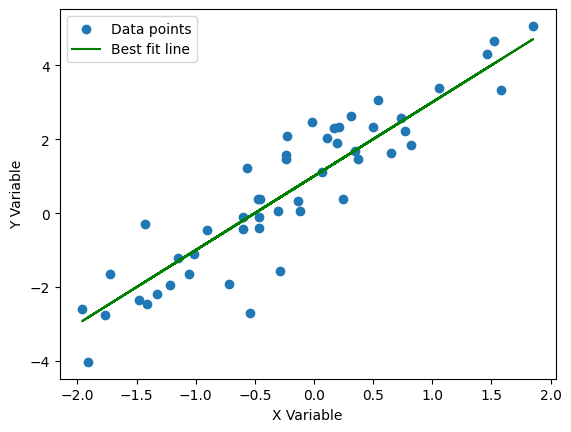

In [13]:
plt.scatter(x = dataset["x"], y = dataset["y"])
plt.plot(dataset["x"],dataset["p"], color = 'green')

plt.xlabel("X Variable")
plt.ylabel("Y Variable")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()


<font size = "5" >

Try it yourself

- Create a new dataset called $\quad$```subset_above2``` 
- Subset records with $y \ge 2$ using $\quad$```.query()```
- Count the original rows $\quad$ ```len(dataset)```
- Count the subsetted rows $\quad$ ```len(subset_above2)```
- Compute the proportion of subsetted observations


In [17]:
import pandas as pd
import numpy as np

# Set parameters
n = 50
np.random.seed(42)

# Create the dataset
dataset = pd.DataFrame()
dataset["x"] = np.random.normal(loc=0, scale=1, size=n)
dataset["e"] = np.random.normal(loc=0, scale=1, size=n)

# Create a 'y' column as a function of 'x' and 'e'
dataset["y"] = 1 + 2 * dataset["x"] + dataset["e"]

# Create a subset where y >= 2 using .query()
subset_above2 = dataset.query('y >= 2')

# Count the original rows
original_count = len(dataset)

# Count the subsetted rows
subset_count = len(subset_above2)

# Compute the proportion of subsetted observations
proportion = subset_count / original_count

# Output results
print("Original number of rows:", original_count)
print("Subsetted number of rows:", subset_count)
print("Proportion of subsetted observations:", proportion)


Original number of rows: 50
Subsetted number of rows: 15
Proportion of subsetted observations: 0.3


<font size = "5">

Try it yourself!

- Store the sample mean of $y$ as $\quad$ ```ybar```
- Compute the standard deviation of $y$ $\quad$ ```stdv_sample```
- Use ```.query()``` to subset observations that satisfy

$ \qquad abs\left(y - ybar \right) \le stdv\_sample $

$\quad$ HINT: Use ```.mean()```,$\text{ }$ ```.std()``` <br>
$\quad$ HINT: Use the globals  $\ $ ```@xbar```,$\text{ }$ ```@stdv_sample```

In [18]:

# Step 1: Compute the sample mean of y and store it as ybar
ybar = dataset["y"].mean()

# Step 2: Compute the standard deviation of y and store it as stdv_sample
stdv_sample = dataset["y"].std()

# Step 3: Use .query() to subset observations satisfying abs(y - ybar) <= stdv_sample
subset_within_std = dataset.query('abs(y - @ybar) <= @stdv_sample')

# Output the results
print("Original number of rows:", len(dataset))
print("Number of rows in subset:", len(subset_within_std))
print("Proportion of observations within 1 standard deviation:", len(subset_within_std) / len(dataset))




Original number of rows: 50
Number of rows in subset: 33
Proportion of observations within 1 standard deviation: 0.66


# II. Estimate the best fit line


<font size = "5">

We have data on $(y,x)$ but we don't know $(b_0,b_1, e)$

<font size = "5">

Let's fit an OLS model

- It's a statistical approach to get $(b_0,b_1)$
- No need to know how it works but why we want it

In [19]:
#------------------------------------------------------------------------------#
# We use the subfunction "ols()" in the library "smf"
#---- (i) The first argument is a string called "formula" with the format 
#-------- "outcome ~ indepdent_vars"
#----(ii) the second argument is the dataset
# The second line fits the model with standard errors "cov". In this case we 
# use "robust" standard errors (HC1)
#-------------------------------------------------------------------------------#

model = smf.ols(formula = 'y ~ x', data = dataset)
results = model.fit()

# Can also run as one line
# results = smf.ols(formula = 'y ~ x',data = dataset).fit(cov = "HC1")


<font size = "5">

Compute the estimated best fit line

In [ ]:
# We will use ".params" to get the attribute "parameters from the results"

b_list = results.params
print(b_list)

# We can then compute the "estimated" best fit lines
# by extracting the intercept and slop from "b_list"

dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]

# Note: The estimators for "b0" and "b1" are close to 
# the values we used to generate the data


Intercept    1.041022
x            2.103076
dtype: float64


/var/folders/nl/c_4v70mj40g0y7p_9vb6r68r0000gq/T/ipykernel_78702/2237251491.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dataset["p_estimated"] = b_list[0] + b_list[1]  * dataset["x"]


<font size = "5">

Plot the best fit line

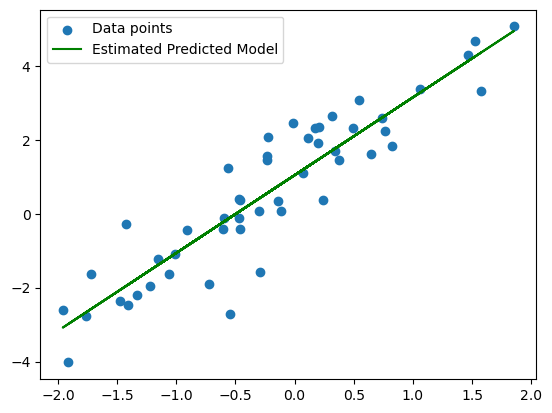

In [ ]:
# Use scatter twice, with different "y" inputs
# THe "legend" command creates a box on with the color labels

plt.scatter(x = dataset["x"],y = dataset["y"])
plt.plot(dataset["x"],dataset["p_estimated"], color = 'green')

plt.legend(labels = ["Data points","Estimated Predicted Model"])
plt.show()


<font size = "5">

Try it yourself!
- How good is the estimated fit?
- Create two overlapping lineplots
- $(p \text{ }$ vs $\text{ } x)$ and $(p_{estimated} \text{ }$ vs $\text{ } x)$
- Create a legend to label each plot

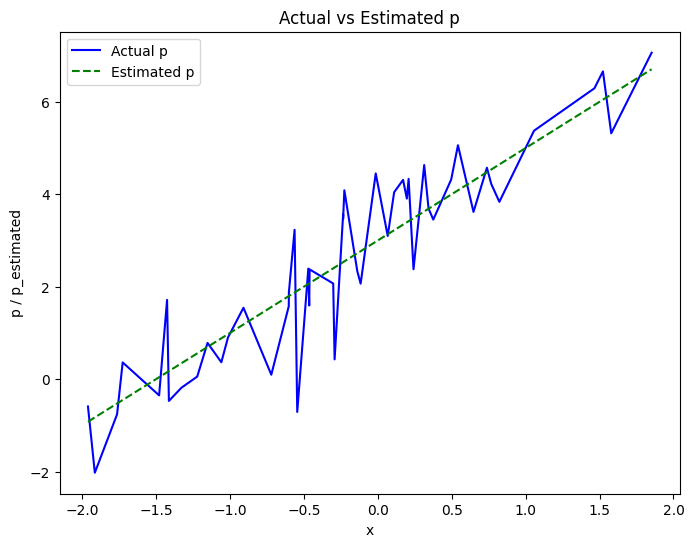

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
n = 50
np.random.seed(42)

# Create the dataset
dataset = pd.DataFrame()
dataset["x"] = np.random.normal(loc=0, scale=1, size=n)
dataset["e"] = np.random.normal(loc=0, scale=1, size=n)

# Create 'p' (actual values) and 'p_estimated' (estimated values)
dataset["p"] = 3 + 2 * dataset["x"] + dataset["e"]  # Actual values
dataset["p_estimated"] = 3 + 2 * dataset["x"]        # Estimated values (without the error term 'e')

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Sort dataset by x for a better line plot
dataset_sorted = dataset.sort_values("x")

# Plot actual p vs x
plt.plot(dataset_sorted["x"], dataset_sorted["p"], color='blue', label="Actual p", linestyle='-')

# Plot estimated p_estimated vs x
plt.plot(dataset_sorted["x"], dataset_sorted["p_estimated"], color='green', label="Estimated p", linestyle='--')

# Add a legend to label the plots
plt.legend()

# Show the plot
plt.xlabel("x")
plt.ylabel("p / p_estimated")
plt.title("Actual vs Estimated p")

plt.show()



<font size = "5">

Try it youself

- Compute a column with the formula

$\quad$ ``` sample_error = y - p_estimated```

- Create a lambda function <br>

$\quad$ ``` fn_positive_error = lambda error: error >= 0  ```

- Compute a column for whether the error is positive <br>
using ``` .apply()```



In [25]:
import pandas as pd
import numpy as np

# Set parameters
n = 50
np.random.seed(42)

# Create the dataset
dataset = pd.DataFrame()
dataset["x"] = np.random.normal(loc=0, scale=1, size=n)
dataset["e"] = np.random.normal(loc=0, scale=1, size=n)

# Create 'y' (actual values) and 'p_estimated' (estimated values)
# Check if 'y' is created correctly
dataset["y"] = 3 + 2 * dataset["x"] + dataset["e"]  # Actual values
dataset["p_estimated"] = 3 + 2 * dataset["x"]        # Estimated values (without the error term 'e')

# Print columns to verify
print("Columns in the dataset:", dataset.columns)

# Step 1: Compute the sample error
dataset["sample_error"] = dataset["y"] - dataset["p_estimated"]

# Step 2: Create a lambda function to check for positive error
fn_positive_error = lambda error: error >= 0

# Step 3: Compute a column for whether the error is positive
dataset["positive_error"] = dataset["sample_error"].apply(fn_positive_error)

# Output the dataset to see the results
print(dataset[["y", "p_estimated", "sample_error", "positive_error"]].head())


Columns in the dataset: Index(['x', 'e', 'y', 'p_estimated'], dtype='object')
          y  p_estimated  sample_error  positive_error
0  4.317512     3.993428      0.324084            True
1  2.338389     2.723471     -0.385082           False
2  3.618455     4.295377     -0.676922           False
3  6.657736     6.046060      0.611676            True
4  3.562693     2.531693      1.031000            True


<font size = "5">

Try it yourself

- Compute a new column <br>

```error_sqr = sample_error ** 2```

- Calculate the mean of ```error_sqr```

In [ ]:
# Write your own code
